In [90]:
%pip install -U sentence-transformers


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [149]:
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer

import torch

In [150]:
model_name = 'bert-large-uncased-whole-word-masking-finetuned-squad'

In [151]:
model = BertForQuestionAnswering.from_pretrained(model_name)

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [152]:
tokenizer = BertTokenizer.from_pretrained(model_name)


## Embedding

In [190]:
question = "What is the capital of France?"
answer_text = "Paris. the capital of France."
# question = "Dimana Menara Eifel terletak?"
# answer_text = "Menara Eifel terletak di Paris, Perancis"

In [191]:
encoding = tokenizer.encode_plus(text=question, text_pair=answer_text)
# encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

print(encoding)

{'input_ids': [101, 2054, 2003, 1996, 3007, 1997, 2605, 1029, 102, 3000, 1012, 1996, 3007, 1997, 2605, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [192]:
# inputs = encoding['input_ids']
# sentence_embedding = encoding['token_type_ids']
inputs = encoding['input_ids']
sentence_embedding = encoding['token_type_ids']
# sentence_embeddings = mean_pooling(model_output, encoding['attention_mask'])
tokens = tokenizer.convert_ids_to_tokens(inputs)

In [193]:
tokenizer.decode(101)

'[CLS]'

In [194]:
tokenizer.decode(102)

'[SEP]'

In [195]:
output = model(input_ids=torch.tensor([inputs]), token_type_ids=torch.tensor([sentence_embedding]))
print(output)

QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[-5.6564, -2.7887, -7.5513, -4.8987, -5.6732, -6.2344, -4.3405, -7.9914,
         -5.6562,  7.0910, -5.9000, -1.6970, -2.2145, -4.3695, -2.0098, -5.6561,
         -5.6559]], grad_fn=<CloneBackward0>), end_logits=tensor([[-0.3743, -1.8303, -5.0285, -5.9212, -4.6940, -5.1458, -1.1887, -4.8764,
         -0.3740,  7.7526, -0.1402, -3.5460, -1.3315, -3.4334,  2.1857, -0.3748,
         -0.3748]], grad_fn=<CloneBackward0>), hidden_states=None, attentions=None)


In [196]:
start_index = torch.argmax(output.start_logits)
end_index = torch.argmax(output.end_logits)

answer = ' '.join(tokens[start_index:end_index+1])

print(answer)

paris


In [16]:
%pip install matplotlib seaborn


  Using cached matplotlib-3.9.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp311-cp311-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
Using cached matplotlib-3.9.2-cp311-cp311-win_amd64.whl (7.8 MB)
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 393.8 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.9 kB 573.4 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 654.9 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 748.1 kB/s eta 0:00:01
   ------------------------- -----


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [197]:


import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
s_scores = output.start_logits.detach().numpy().flatten()
e_scores = output.end_logits.detach().numpy().flatten()


In [199]:
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(token, i))

C:\Users\Olionnn\AppData\Local\Temp\ipykernel_17660\2447522196.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=token_labels, y=s_scores, ci=None)
C:\Users\Olionnn\AppData\Local\Temp\ipykernel_17660\2447522196.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


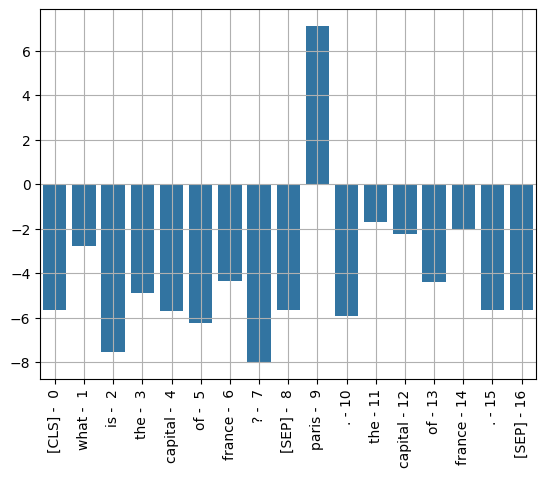

In [200]:
ax = sns.barplot(x=token_labels, y=s_scores, ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)

In [202]:
# digipoin_faq = 'Digital Poin Teknologi adalah perusahaan yang berfokus pada pengembangan solusi teknologi inovatif untuk membantu bisnis tumbuh dan berkembang secara berkelanjutan. Layanan utama yang ditawarkan meliputi pengembangan aplikasi mobile, pengembangan aplikasi web, dan layanan desain UI/UX, yang dirancang untuk menciptakan pengalaman pengguna yang intuitif serta memenuhi kebutuhan bisnis modern. Berbagai proyek sukses telah membuktikan kompetensi perusahaan, seperti pengembangan sistem undian otomatis untuk MR.DIY dan sistem keanggotaan untuk MR.DIY Indonesia, yang berperan penting dalam meningkatkan keterlibatan serta loyalitas pelanggan. Dengan lokasi kantor di Jl. Sultan Iskandar Muda, Kebayoran Lama Utara, Jakarta Selatan, Digital Poin Teknologi berkomitmen untuk menjadi mitra dalam transformasi digital, membantu klien mengadopsi teknologi terbaru dan memastikan mereka tetap kompetitif di pasar. Melalui pendekatan kolaboratif, perusahaan ini fokus pada pemberian solusi yang berdampak dan relevan, sekaligus menjadi bagian penting dalam perjalanan klien menuju kesuksesan jangka panjang di era digital.'
digipoin_faq = 'Digital Poin Teknologi is a company focused on developing innovative technology solutions to help businesses grow and thrive sustainably. The primary services offered include mobile application development, web application development, and UI/UX design services, all tailored to create intuitive user experiences and meet the needs of modern businesses. The company’s competence is demonstrated through various successful projects, such as the development of an automated lottery system for MR.DIY and a membership system for MR.DIY Indonesia, which play a crucial role in enhancing customer engagement and loyalty.With its office located on Jl. Sultan Iskandar Muda, Kebayoran Lama Utara, South Jakarta, Digital Poin Teknologi is committed to being a partner in digital transformation, helping clients adopt the latest technologies and ensuring they remain competitive in the market. Through a collaborative approach, the company focuses on delivering impactful and relevant solutions while becoming a vital part of clients\' long-term success in the digital era.'
print(digipoin_faq)

Digital Poin Teknologi is a company focused on developing innovative technology solutions to help businesses grow and thrive sustainably. The primary services offered include mobile application development, web application development, and UI/UX design services, all tailored to create intuitive user experiences and meet the needs of modern businesses. The company’s competence is demonstrated through various successful projects, such as the development of an automated lottery system for MR.DIY and a membership system for MR.DIY Indonesia, which play a crucial role in enhancing customer engagement and loyalty.With its office located on Jl. Sultan Iskandar Muda, Kebayoran Lama Utara, South Jakarta, Digital Poin Teknologi is committed to being a partner in digital transformation, helping clients adopt the latest technologies and ensuring they remain competitive in the market. Through a collaborative approach, the company focuses on delivering impactful and relevant solutions while becoming

In [203]:
def faq_bot(question):
    context = digipoin_faq
    input_ids = tokenizer.encode(question, context)
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    sep_index = input_ids.index(tokenizer.sep_token_id)
    num_seg_a = sep_index + 1
    num_seg_b = len(input_ids) - num_seg_a
    segment_ids = [0]*num_seg_a + [1]*num_seg_b
    outputs = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))
    start_scores = outputs.start_logits
    end_scores = outputs.end_logits
    answer_start = torch.argmax(start_scores)
    answer_end = torch.argmax(end_scores)
    if answer_end >= answer_start:
        answer = ' '.join(tokens[answer_start:answer_end+1])
    else:
        answer = ' '.join(tokens[answer_start:])
    corrected_answer = ''
    for word in answer.split():
        if word[0:2] == '##':
            corrected_answer += word[2:]
        else:
            corrected_answer += ' ' + word
    return corrected_answer



In [206]:

question = "What services does Digital Poin Teknologi provide?"
faq_bot(question)

' mobile application development , web application development , and ui / ux design services'

In [205]:
question = "Where is Digital Poin Teknologi located?"
faq_bot(question)

' south jakarta'

In [208]:
question = "What is success story of Digital Poin Teknologi?"
faq_bot(question)

' development of an automated lottery system for mr . diy and a membership system for mr . diy indonesia'

In [210]:
question = "What is the commitment of Digital Poin Teknologi?"
faq_bot(question)

' being a partner in digital transformation'

In [211]:
question = "Digipoin stands for?"
faq_bot(question)

' digital poin teknologi'